<img  align="right" width="250" src="recycling centre - pic.JPG" style= "float: right; margin: 0 50px 50px 50px;">

# Booking system project 

## Discovery of data insights to evaluate customer patterns and potential cost savings on a recycling centre

***


### Summary: In this project, booking system dataset from a recycling centre located in London is analysed and main KPIs are calculated. 
### - Data cleaning and transformation was done as data quality issues were identified. 
### - All personal/sensitive data from datasets was encrypted or deleted for GDPR compliance.

<hr style="margin-bottom: 40px;">

### Main insights:


### Import of libraries

In [2]:
import numpy as np 
import pandas as pd
import random
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.patches import ConnectionPatch


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,8)

from datetime import datetime
import ipywidgets as widgets

### Import of all datasets 

In [3]:
Recycling_centreA = pd.read_excel(r'C:\Users\Tiago\Desktop\Github\Professional_Portfolio\Booking system_dashboard\Recycling centre A - bookings.xlsx')

#file path to be amended

In [4]:
Recycling_centreA_capacity = pd.read_excel(r'C:\Users\Tiago\Desktop\Github\Professional_Portfolio\Booking system_dashboard\Recycling centre A - max. capacity.xlsx')

#file path to be amended

### Preview of datasets

In [5]:
Recycling_centreA.head()

,Booking created,Postcode,Ward,Type of vehicle,Site,Are you hiring a vehicle?,Registration plate,Batteries (car & household),Books,Bulky non-recyclables,...,Tyres (maximum 2),Wooden furniture (whole or dismantled),Asbestos (needs to be double wrapped),Garden wood (decking/fencing/shed),Kitchen and bathroom fixtures and fixings,Plasterboard,Soil and turf,Wooden flooring (including laminate),Booking date/time,ClosureReason
0,2023-02-18 16:02:04,HA9 9SL,Barnhill,Car,Recycling centre A (Car / Small van),No,KEaakzIUFU,Yes,No,Yes,...,No,No,No,No,No,No,No,No,2023-04-07 09:00:00,Complete
1,2023-03-03 15:56:33,HA0 3TJ,Northwick Park,Car,Recycling centre A (Car / Small van),Yes,HIREVEHICLE,No,No,No,...,No,No,No,No,No,No,No,No,2023-04-02 10:00:00,Complete
2,2023-03-14 21:05:24,W3 6TW,East Acton,Car,Recycling centre A (Car / Small van),No,LAbzaaDZT,Yes,No,No,...,No,No,No,No,No,No,No,No,2023-04-03 13:30:00,No show
3,2023-03-20 13:42:29,W10 5QG,Kensal Green,Car,Recycling centre A (Car / Small van),No,LOaabzbzRKX,No,Yes,Yes,...,No,Yes,No,No,No,No,No,No,2023-04-02 13:00:00,Cancelled by customer
4,2023-03-20 14:10:47,HA9 6DH,NaN,Car,Recycling centre A (Car / Small van),No,FHbzbzhbtUMF,Yes,No,No,...,No,Yes,No,No,No,No,No,No,2023-04-02 14:00:00,No show


In [6]:
Recycling_centreA_capacity.head(7)

,Date,Group,Total booked,Total spaces
0,01/04/2023,Recycling centre A (car / small van),145,400
1,01/04/2023,Recycling centre A (medium / large van),8,15
2,01/04/2023,Recycling centre A (pedestrian / bicycle),2,48
3,02/04/2023,Recycling centre A (car / small van),165,400
4,02/04/2023,Recycling centre A (medium / large van),14,15
5,02/04/2023,Recycling centre A (pedestrian / bicycle),3,48
6,03/04/2023,Recycling centre A (car / small van),103,400


## Data Cleaning

### Columns headers terminology check and amendments done

In [7]:
Recycling_centreA_columns_names=pd.Series(Recycling_centreA.columns)

#changing the max_columns value to display all the columns
pd.set_option('display.max_rows',None)

#display the dataset
Recycling_centreA_columns_names

0                                       Booking created
1                                              Postcode
2                                                  Ward
3                                       Type of vehicle
4                                                  Site
5                             Are you hiring a vehicle?
6                                    Registration plate
7                           Batteries (car & household)
8                                                 Books
9                                 Bulky non-recyclables
10                                      Carpet and lino
11                         Clothes and textiles (mixed)
12                                          Cooking oil
13                                           Engine oil
14                                    Fluorescent tubes
15                                 Fridges and freezers
16                         Garden cuttings and prunings
17                                  Gas bottles 

In [8]:
Recycling_centreA.rename(columns = {'Mattresses (from your home only)':'Mattresses'
                                    ,'Clothes and textiles (mixed)':'clothes and textiles'
                                    }, inplace=True)

In [15]:
Recycling_centreA[['Booking_date','Booking_time']]=Recycling_centreA['Booking date/time'].apply(str).str.split(' ', expand=True)
Recycling_centreA[['Booking_date']]= Recycling_centreA[['Booking_date']].apply(pd.to_datetime, format='%Y-%m-%d').map(lambda x: x.strftime('%d/%m/%Y'))
Recycling_centreA[['Booking_time']]= Recycling_centreA[['Booking_time']].apply(pd.to_datetime, format='%H:%M:%S').map(lambda x: x.strftime('%H:%M'))
Recycling_centreA.drop(columns=['Booking date/time'],inplace=True)

KeyError: 'Booking date/time'

In [10]:
Recycling_centreA['Booking created']=Recycling_centreA['Booking created'].dt.date.map(lambda x: x.strftime('%d/%m/%Y'))

### Creation of the column "Day of the week" 

In [16]:
Recycling_centreA['Booking_date_dayofweek'] = pd.to_datetime(Recycling_centreA['Booking_date'],format='%d/%m/%Y').dt.day_name()

Recycling_centreA['Booking_date_month']= pd.to_datetime(Recycling_centreA['Booking_date'],format='%d/%m/%Y').dt.month_name()

In [17]:
# Recycling_centreA

Recycling_centreA.rename(columns={'Site':'Vehicle type'}, inplace=True)

Recycling_centreA['Vehicle type']=Recycling_centreA['Vehicle type'].apply(lambda x: x[x.find('(')+1:x.find(')')])



In [18]:
Recycling_centreA.head()


,Booking created,Postcode,Ward,Type of vehicle,Vehicle type,Are you hiring a vehicle?,Registration plate,Batteries (car & household),Books,Bulky non-recyclables,...,Garden wood (decking/fencing/shed),Kitchen and bathroom fixtures and fixings,Plasterboard,Soil and turf,Wooden flooring (including laminate),ClosureReason,Booking_date,Booking_time,Booking_date_dayofweek,Booking_date_month
0,18/02/2023,HA9 9SL,Barnhill,Car,Car / Small va,No,KEaakzIUFU,Yes,No,Yes,...,No,No,No,No,No,Complete,07/04/2023,09:00,Friday,April
1,03/03/2023,HA0 3TJ,Northwick Park,Car,Car / Small va,Yes,HIREVEHICLE,No,No,No,...,No,No,No,No,No,Complete,02/04/2023,10:00,Sunday,April
2,14/03/2023,W3 6TW,East Acton,Car,Car / Small va,No,LAbzaaDZT,Yes,No,No,...,No,No,No,No,No,No show,03/04/2023,13:30,Monday,April
3,20/03/2023,W10 5QG,Kensal Green,Car,Car / Small va,No,LOaabzbzRKX,No,Yes,Yes,...,No,No,No,No,No,Cancelled by customer,02/04/2023,13:00,Sunday,April
4,20/03/2023,HA9 6DH,NaN,Car,Car / Small va,No,FHbzbzhbtUMF,Yes,No,No,...,No,No,No,No,No,No show,02/04/2023,14:00,Sunday,April


### Correction of terminology between both datasets

In [19]:
#Recycling_centreA_capacity

column_vehicletype=Recycling_centreA_capacity['Group']

Recycling_centreA_capacity['Group'] =column_vehicletype.apply(lambda x:x[x.find('(')+1:x.find(')')])

Recycling_centreA_capacity.head()

,Date,Group,Total booked,Total spaces
0,01/04/2023,car / small van,145,400
1,01/04/2023,medium / large van,8,15
2,01/04/2023,pedestrian / bicycle,2,48
3,02/04/2023,car / small van,165,400
4,02/04/2023,medium / large van,14,15


In [20]:
Vehicle_type_unique = Recycling_centreA_capacity['Group'].unique()

for i in Vehicle_type_unique:
    new_variable_name = f'max_capacity_{i.replace(" ","").replace("/","_")}'
    variable_temp = Recycling_centreA_capacity.loc[Recycling_centreA_capacity['Group']==i].copy()
    variable_temp.drop(columns=['Group','Total booked'], inplace=True)
    variable_temp.rename(columns = {'Date':'Booking_date','Total booked':f'total_booked_{i}','Total spaces':f'max_spaces_{i}'}, inplace=True)
    globals()[new_variable_name]=variable_temp.set_index('Booking_date')
    print(new_variable_name)

max_capacity_car_smallvan
max_capacity_medium_largevan
max_capacity_pedestrian_bicycle


In [21]:
#Visualisation of the variable as an example

max_capacity_car_smallvan.head(2)

,max_spaces_car / small van
Booking_date,
01/04/2023,400
02/04/2023,400


In [22]:
All_vehicletype_capacity=max_capacity_car_smallvan.merge(max_capacity_medium_largevan, on='Booking_date').merge(max_capacity_pedestrian_bicycle, on='Booking_date')
All_vehicletype_capacity.head()

,max_spaces_car / small van,max_spaces_medium / large van,max_spaces_pedestrian / bicycle
Booking_date,,,
01/04/2023,400,15,48
02/04/2023,400,15,48
03/04/2023,400,15,48
06/04/2023,400,15,48
07/04/2023,400,15,48


### Dataset 'Recycling_centreA_capacity'

In [23]:
Recycling_centreA_all=Recycling_centreA.merge(All_vehicletype_capacity, how='left',  on='Booking_date')

In [24]:
Recycling_centreA_all.head()

,Booking created,Postcode,Ward,Type of vehicle,Vehicle type,Are you hiring a vehicle?,Registration plate,Batteries (car & household),Books,Bulky non-recyclables,...,Soil and turf,Wooden flooring (including laminate),ClosureReason,Booking_date,Booking_time,Booking_date_dayofweek,Booking_date_month,max_spaces_car / small van,max_spaces_medium / large van,max_spaces_pedestrian / bicycle
0,18/02/2023,HA9 9SL,Barnhill,Car,Car / Small va,No,KEaakzIUFU,Yes,No,Yes,...,No,No,Complete,07/04/2023,09:00,Friday,April,400.0,15.0,48.0
1,03/03/2023,HA0 3TJ,Northwick Park,Car,Car / Small va,Yes,HIREVEHICLE,No,No,No,...,No,No,Complete,02/04/2023,10:00,Sunday,April,400.0,15.0,48.0
2,14/03/2023,W3 6TW,East Acton,Car,Car / Small va,No,LAbzaaDZT,Yes,No,No,...,No,No,No show,03/04/2023,13:30,Monday,April,400.0,15.0,48.0
3,20/03/2023,W10 5QG,Kensal Green,Car,Car / Small va,No,LOaabzbzRKX,No,Yes,Yes,...,No,No,Cancelled by customer,02/04/2023,13:00,Sunday,April,400.0,15.0,48.0
4,20/03/2023,HA9 6DH,NaN,Car,Car / Small va,No,FHbzbzhbtUMF,Yes,No,No,...,No,No,No show,02/04/2023,14:00,Sunday,April,400.0,15.0,48.0


<hr style="margin-bottom: 40px;">

# Data Analysis

### Average number of daily bookings per recycling centre


In [25]:
Recycling_centreA['Booking_date'] = pd.to_datetime(Recycling_centreA['Booking_date'], format='%d/%m/%Y')
df_sorted = Recycling_centreA['Booking_date'].value_counts().reset_index()
df_sorted.columns = ['Booking_date','Daily_bookings']
df_sorted = df_sorted.sort_values(by='Booking_date')

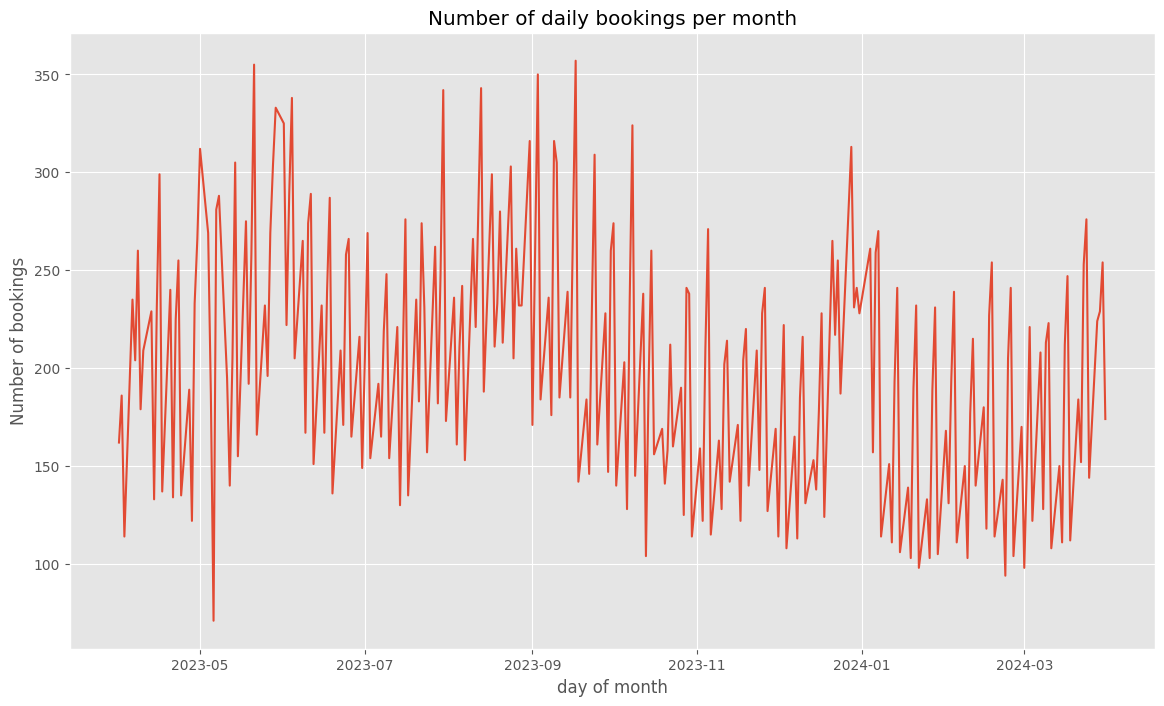

In [26]:
plt.plot(df_sorted['Booking_date'], df_sorted['Daily_bookings'])
plt.xlabel('day of month')
plt.ylabel('Number of bookings')
plt.title('Number of daily bookings per month')
plt.show()

In [28]:
Apr_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='April']
May_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='May']
Jun_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='June']
Jul_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='July']
Aug_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='August']
Sep_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='September']
Oct_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='October']
Nov_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='November']
Dec_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='December']
Jan_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='January']
Feb_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='February']
Mar_data = Recycling_centreA.loc[Recycling_centreA['Booking_date_month']=='March']


button=widgets.ToggleButtons(
    options=[('April', 'Apr_data'),
             ('May', 'May_data'),
             ('June', 'Jun_data'),
             ('July', 'Jul_data'),
             ('August', 'Aug_data'),
             ('September', 'Sep_data'),
             ('October', 'Oct_data'),
             ('November', 'Nov_data'),
             ('December', 'Dec_data'),
             ('January', 'Jan_data'),
             ('February', 'Feb_data'),
             ('March', 'Mar_data')],
            description='Please choose one of the months:',
            disabled=False,
            button_style='info',
           #     icons=['check'] * 12
)
display(button)

ToggleButtons(button_style='info', description='Please choose one of the months:', options=(('April', 'Apr_dat…

In [49]:
Data_month_selected = globals()[button.value]
Data_month_selected.describe()

,Booking_date
count,4148
mean,2023-10-15 11:49:14.291224576
min,2023-10-01 00:00:00
25%,2023-10-08 00:00:00
50%,2023-10-15 00:00:00
75%,2023-10-23 00:00:00
max,2023-10-30 00:00:00


In [66]:
A=Data_month_selected.loc[:,['Booking_date']]

#ESTAMOS AQUI

In [67]:
A.to_datetime(Data_month_selected['Booking_date'],format='%d-%m-%Y')


AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [ ]:


Month_selected_copy = Month_selected_copy['Booking_date'].value_counts().reset_index()
Month_selected_copy.columns = ['Booking_date','Daily_bookings']
Month_selected_copy = Month_selected_copy.sort_values(by='Booking_date')

In [41]:
Month_selected_copy.head()

,Booking_date,Daily_bookings
0,2023-04-01,1
33,2023-04-02,1
166,2023-04-03,1
167,2023-04-06,1
168,2023-04-07,1


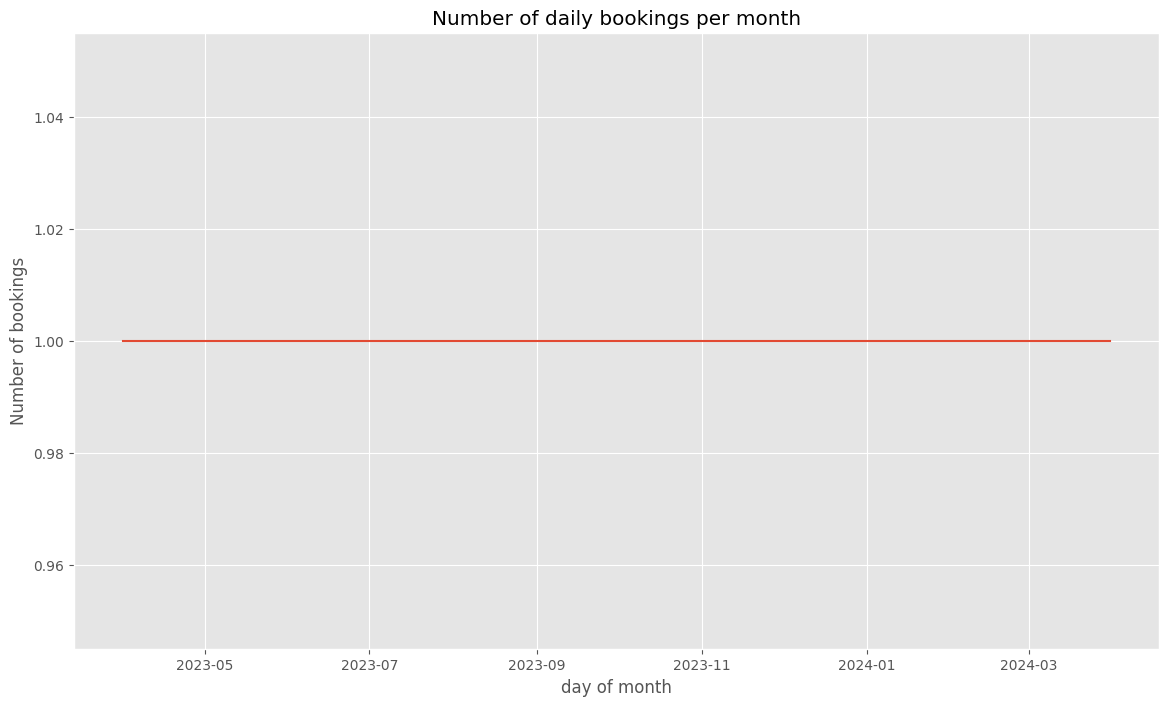

In [39]:
plt.plot(Month_selected_copy['Booking_date'], Month_selected_copy['Daily_bookings'])
plt.xlabel('day of month')
plt.ylabel('Number of bookings')
plt.title('Number of daily bookings per month')
plt.show()

### Average number of bookings per day of the week per recycling centre

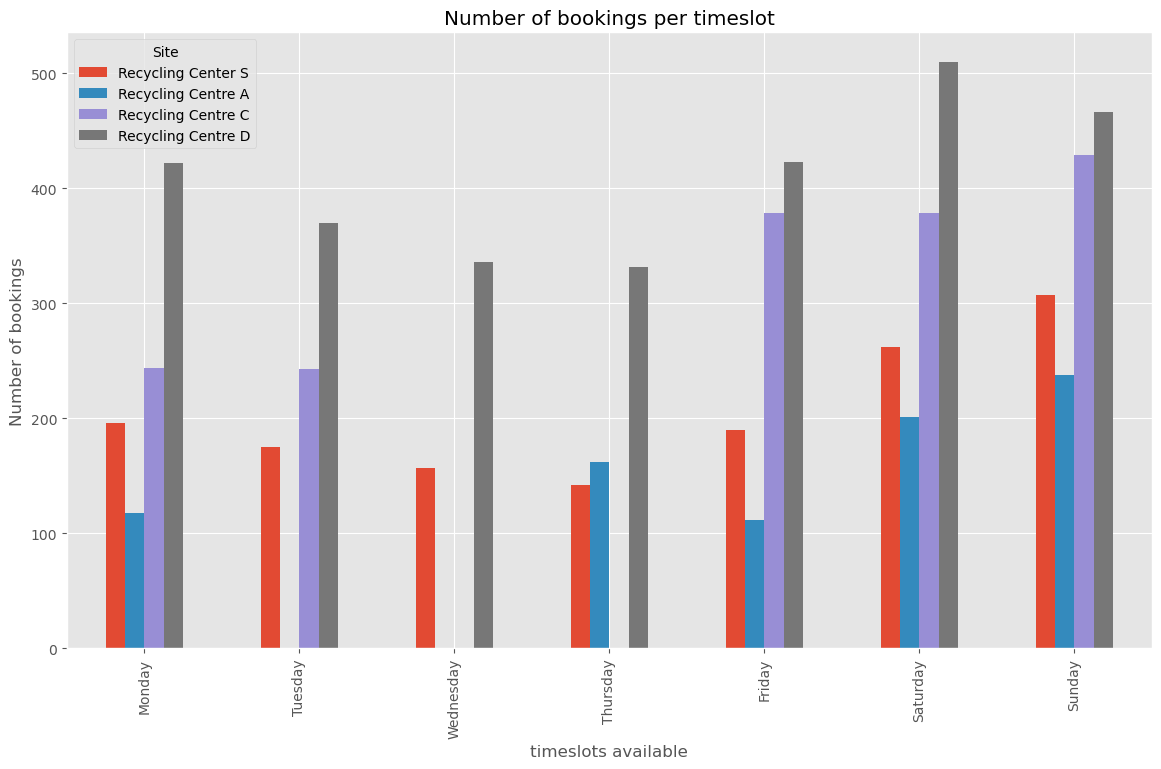

In [ ]:
Ordered_weekday = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')

bookings_per_site = pd.crosstab(Main_dataset['Booking_date_dayofweek'],Main_dataset['Site'])

Count_weekdays_month = Main_dataset[['Booking_date_dayofweek','Booking_date']].drop_duplicates('Booking_date').value_counts('Booking_date_dayofweek')

average_bookings_per_weekday = bookings_per_site.div(Count_weekdays_month, axis = 0).reindex(Ordered_weekday, axis=0)

average_bookings_per_weekday.plot(kind='bar',
                               xlabel = 'timeslots available',
                               ylabel = 'Number of bookings',
                               title = 'Number of bookings per timeslot')

plt.show()

### What are the materials brought the most to each recycling centre?

In [ ]:
materials=Main_dataset.drop(columns=[
    'Are you hiring a vehicle?',
    'Booking_date',
    'Booking_date_dayofweek',
    'ClosureReason',
    'Booking created_date',
    'Booking created_time',
    'Booking_time',
    'Type of vehicle',
    'Vehicle reg',
    'Ward',
    'Postcode',
    'Are you hiring a vehicle?'])

materials_RCA = materials.loc[materials['Site']=='Recycling Centre A'].apply(pd.Series.value_counts).drop(['Recycling Centre A','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCA_top10 = materials_RCA.head(10).sort_values('Yes').squeeze()

materials_RCC = materials.loc[materials['Site']=='Recycling Centre C'].apply(pd.Series.value_counts).drop(['Recycling Centre C','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCC_top10 = materials_RCC.head(10).sort_values('Yes').squeeze()

materials_RCD = materials.loc[materials['Site']=='Recycling Centre D'].apply(pd.Series.value_counts).drop(['Recycling Centre D','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCD_top10 = materials_RCD.head(10).sort_values('Yes').squeeze()

materials_RCS = materials.loc[materials['Site']=='Recycling Center S'].apply(pd.Series.value_counts).drop(['Recycling Center S','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCS_top10 = materials_RCS.head(10).sort_values('Yes').squeeze()

Text(0.5, 1.0, 'Recycling Centre S')

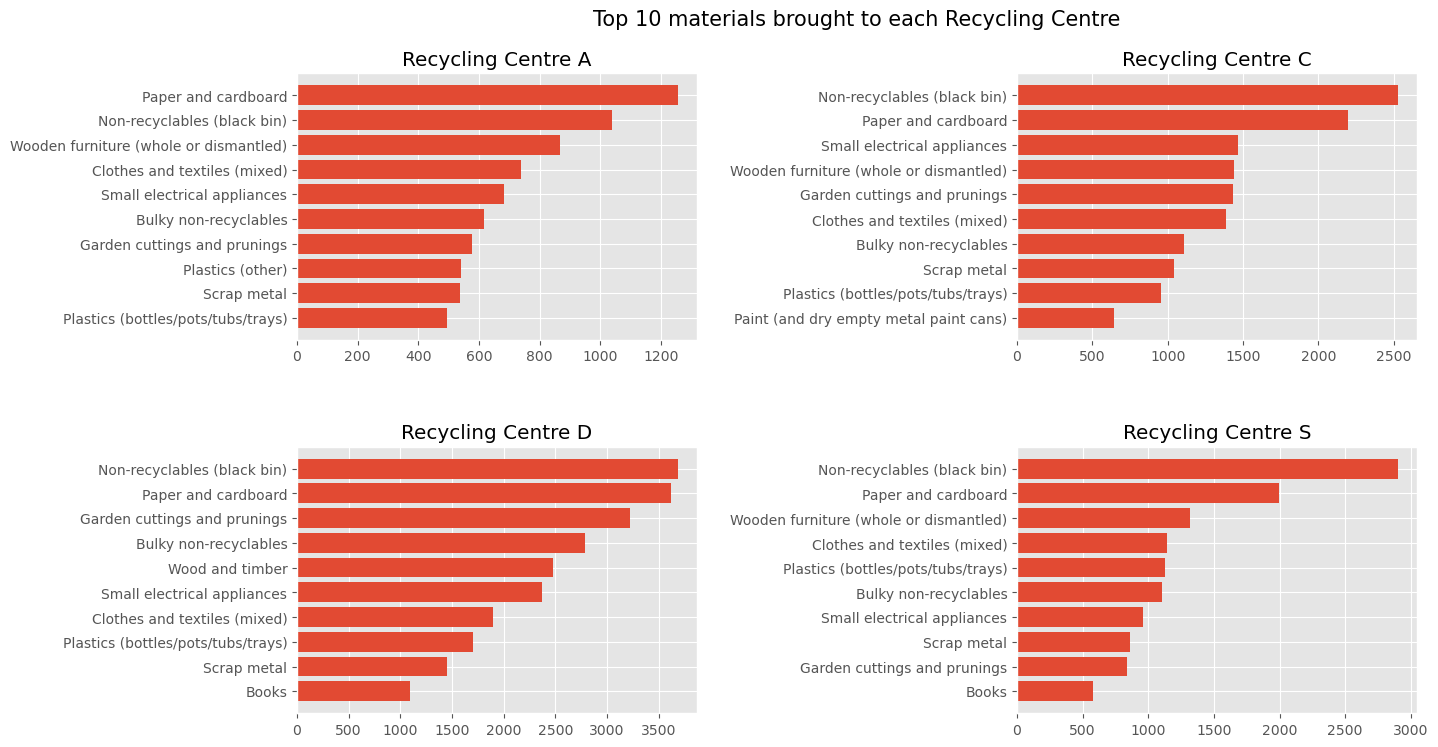

In [ ]:
fig, axs = plt.subplots(2,2)
fig.suptitle('Top 10 materials brought to each Recycling Centre', size=15)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.8, hspace=0.4)
axs[0,0].barh(materials_RCA_top10.index,materials_RCA_top10 )
axs[0,0].set_title('Recycling Centre A')
axs[0,1].barh(materials_RCC_top10.index,materials_RCC_top10)
axs[0,1].set_title('Recycling Centre C')
axs[1,0].barh(materials_RCD_top10.index,materials_RCD_top10)
axs[1,0].set_title('Recycling Centre D')
axs[1,1].barh(materials_RCS_top10.index,materials_RCS_top10)
axs[1,1].set_title('Recycling Centre S')

<hr style="margin-bottom: 40px;">

## Deep data analysis - per recycling centre

### User to select the recycling centre to be deep analysed

In [60]:
RCA_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Centre A'] 
RCC_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Centre C'] 
RCD_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Centre D'] 
RCS_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Center S'] 

button=widgets.ToggleButtons(
    options=[('Recycling Center A', 'RCA_data'),
             ('Recycling Center C', 'RCC_data'),
             ('Recycling Center D', 'RCD_data'),
             ('Recycling Center S', 'RCS_data')],
            description='Please choose one of the recycling centre:',
            disabled=False,
            button_style='info',
           #     icons=['check'] * 4
)
display(button)

NameError: name 'Main_dataset' is not defined

### Breakdown of bookings status and transport types used by residents to attend recycling centre

In [ ]:
data_selected = globals()[button.value]

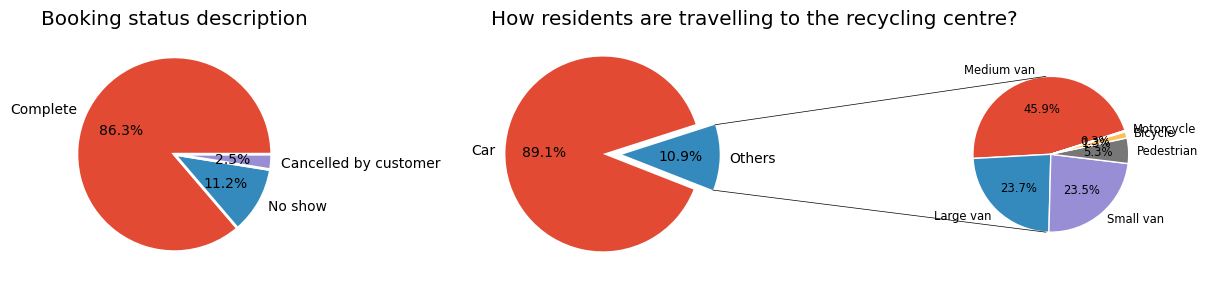

In [ ]:


Vehicles_categ = data_selected['Type of vehicle'].value_counts(normalize=True)
       
#bookings categorisation 
pie_data = data_selected['ClosureReason'].value_counts(normalize=True).squeeze()

if len(Vehicles_categ)==1:
    
        fig, (ax1,ax2) = plt.subplots(1,2)

        fig.subplots_adjust(left=0.1, 
                            right=0.9, 
                            bottom=0.1, 
                            top=0.9, 
                            wspace=0.8, 
                            hspace=0.4)
        
        ax1.pie(labels = pie_data_data.index, 
                x=pie_data,
                autopct = '%.1f%%',
                wedgeprops={'edgecolor':'white',
                         'linewidth':2,
                         'antialiased':True}
        )
        
        ax1.set_title('Booking status description')

        ax2.pie(Vehicles_categ, 
                autopct = '%.f%%',
                labels=Vehicles_categ.index)
        
        ax2.set_title('How residents are travelling to the recycling centre?', loc='center')  

else:

        fig, (ax1,ax2,ax3) = plt.subplots(1,3)
        
        fig.subplots_adjust(left=0.1, 
                            right=0.9, 
                            bottom=0.1, 
                            top=0.9, 
                            wspace=0.8, 
                            hspace=0.4)
    
        ax1.pie(labels = pie_data.index, 
             x=pie_data,
             autopct = '%.1f%%',
             wedgeprops={'edgecolor':'white',
                         'linewidth':2,
                         'antialiased':True}
        )
        ax1.set_title('Booking status description')

        Vehicles_sub_categ = Vehicles_categ[Vehicles_categ<0.2]
        Vehicles_main_categ = pd.concat([pd.Series(Vehicles_categ[Vehicles_categ>0.2]),
                                         pd.Series(data=[sum(Vehicles_sub_categ)], 
                                                   index=['Others'])])                                                       

        #How are residents drivings to the recycling centres?     

        # large pie chart parameters
        Vehicles_main_categ
        Vehicles_main_categ.index
        explode = [0.1,0.1]
        ax2.set_title('How residents are travelling to the recycling centre?', loc='left')  

        # rotate so that first wedge is split by the x-axis
        angle = 20*Vehicles_main_categ.iloc[0]
        ax2.pie(Vehicles_main_categ,
                autopct='%1.1f%%', 
                startangle=angle,
                labels=Vehicles_main_categ.index, 
                explode=explode)

        # small pie chart parameters
        Vehicles_sub_categ
        Vehicles_sub_categ.index 
        width = .1


        ax3.pie(Vehicles_sub_categ, 
                autopct='%1.1f%%', 
                startangle=angle,
                labels=Vehicles_sub_categ.index, 
                radius=0.8, 
                textprops={'size': 'smaller'},
                wedgeprops={'edgecolor':'white',
                            'linewidth':1,
                            'antialiased':True})

        # use ConnectionPatch to draw lines between the two plots
        # get the wedge data
        theta1, theta2 = ax2.patches[1].theta1, ax2.patches[1].theta2
        center, r = ax2.patches[1].center, ax2.patches[1].r

        # draw top connecting line
        x = r * np.cos(np.pi / 180 * theta2) + center[0]
        y = np.sin(np.pi / 180 * theta2) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, .8), 
                              xyB=(x, y),
                              coordsA="data", 
                              coordsB="data", 
                              axesA=ax3,
                              axesB=ax2)
        con.set_color([0, 0, 0])
        con.set_linewidth(0.5)
        ax3.add_artist(con)

        # draw bottom connecting line
        x = r * np.cos(np.pi / 180 * theta1) + center[0]
        y = np.sin(np.pi / 180 * theta1) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, -.8), xyB=(x, y), coordsA="data",
                        coordsB="data", axesA=ax3, axesB=ax2)
        con.set_color([0, 0, 0])
        ax3.add_artist(con)
        con.set_linewidth(0.5)

        plt.show()


### Average number of bookings per timeslot per weekday

In [ ]:
Bookings_timeslot_weekday = pd.crosstab(data_selected['Booking_date_dayofweek'],data_selected['Booking_time']).reindex(Ordered_weekday, axis=0)

Count_weekdays_data_selected = data_selected[['Booking_date_dayofweek','Booking_date']].drop_duplicates('Booking_date').value_counts('Booking_date_dayofweek').reindex(Ordered_weekday, axis=0)

average_bookings_timeslot_weekday= Bookings_timeslot_weekday.div(Count_weekdays_data_selected, axis = 0).dropna().T

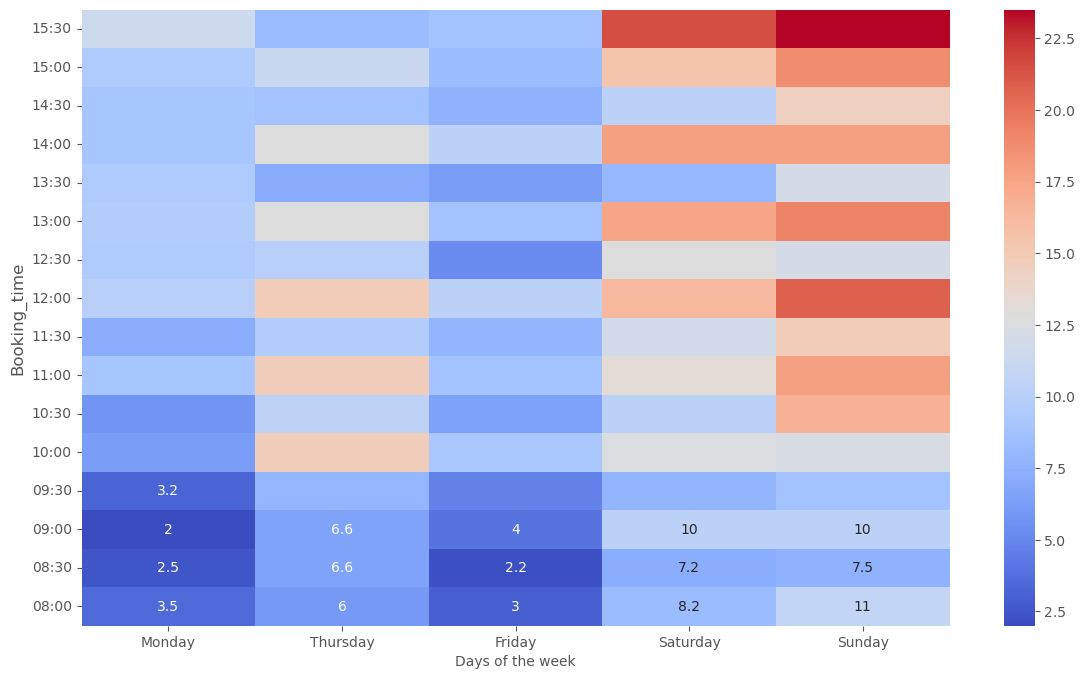

In [ ]:
sns.heatmap(average_bookings_timeslot_weekday,
            cmap="coolwarm",
            annot=True,
            
)
plt.yticks(rotation=0) 
plt.xlabel('Days of the week',
           fontsize=10)
plt.ylim([0,16])
plt.show()

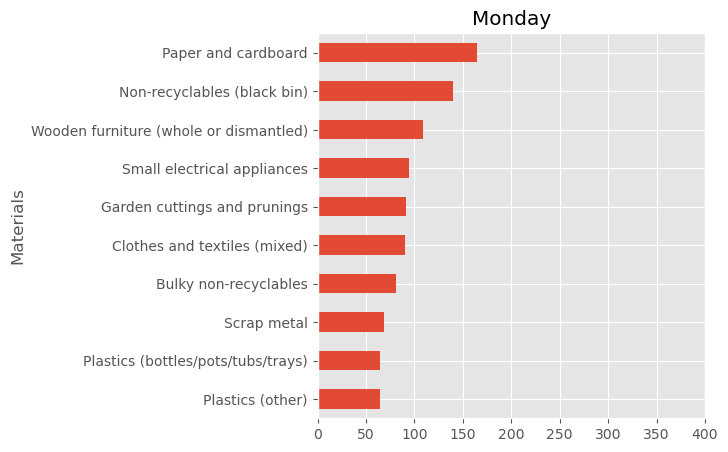

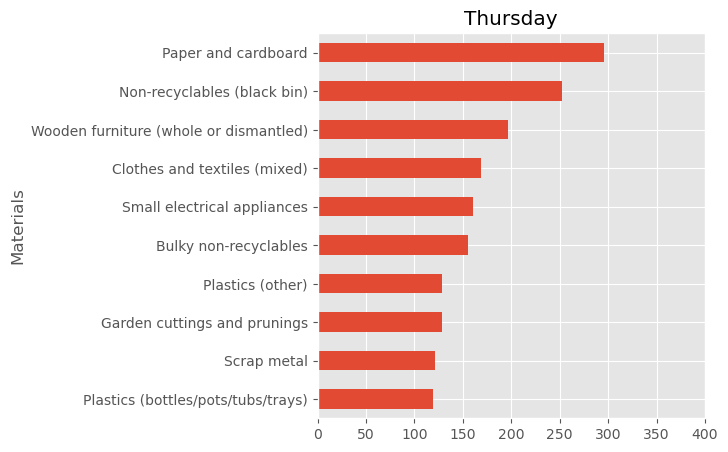

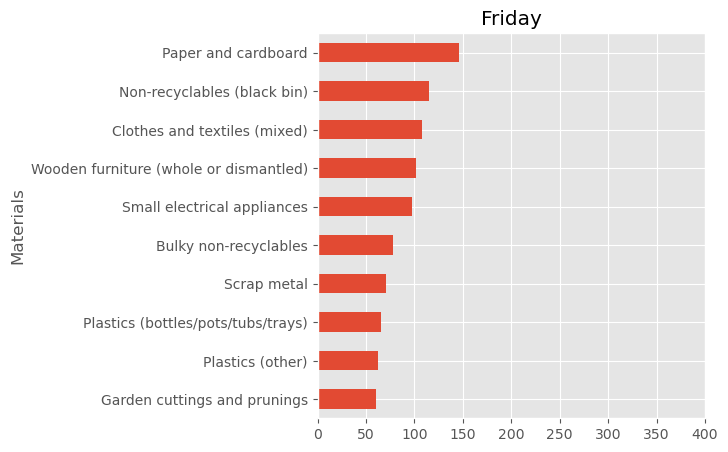

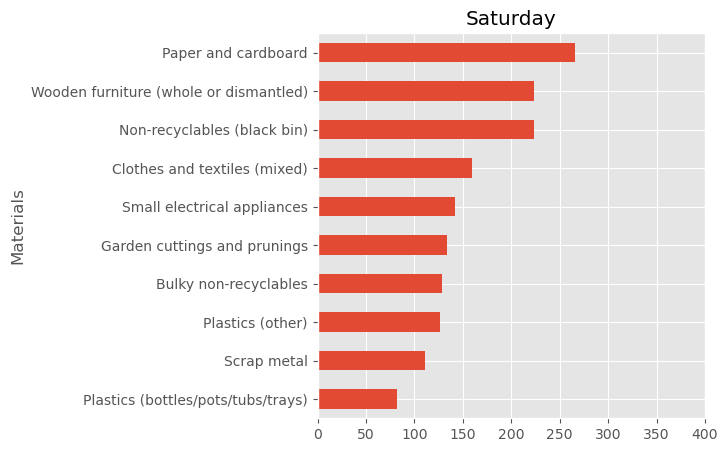

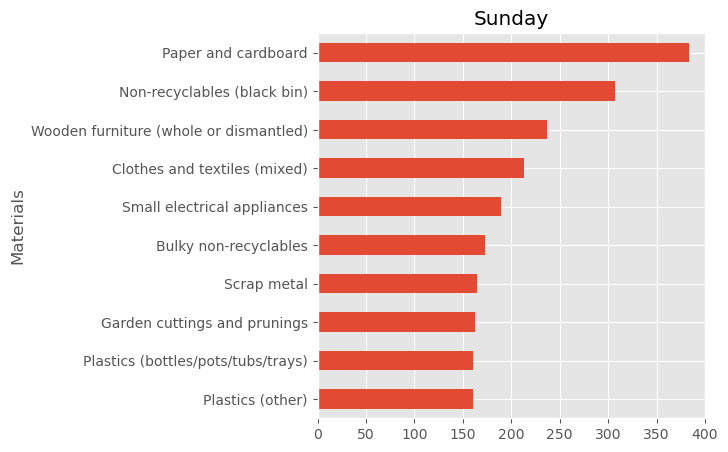

In [ ]:
materials2=data_selected.drop(columns=[
    'Are you hiring a vehicle?',
    'Booking_date',
    'ClosureReason',
    'Booking created_date',
    'Booking created_time',
    'Booking_time',
    'Type of vehicle',
    'Vehicle reg',
    'Ward',
    'Postcode',
    'Are you hiring a vehicle?'])

dayofweek_unique = materials2['Booking_date_dayofweek'].unique()
dayofweek_unique_ordered=sorted(dayofweek_unique,key=Ordered_weekday.index)

for i in dayofweek_unique_ordered:
    new_variable_name = f"Materials2_{i[0:3]}"
    globals()[new_variable_name] = materials2.loc[materials2['Booking_date_dayofweek']==i].drop(['Site','Booking_date_dayofweek'], axis=1).apply(pd.Series.value_counts).drop(index='No').T.dropna().rename(columns={'Yes':i}).sort_values(i,ascending=False)
    subset = f"charts_Materials2_{i[0:3]}"
    globals()[subset] = globals()[new_variable_name].head(10).plot(kind="barh",legend=False, figsize=(5,5))
    plt.title(i)
    plt.ylabel('Materials')
    plt.xlim([0,400])
    plt.gca().invert_yaxis()

In [ ]:
# set the filepath and load in a shapefile
#! C:\Users\Tiago S\Desktop\Github repositories\Python_Coding\Booking system project\VirtualEnv\Scripts\python.exe

import pgeocode
import plotly.express as px

nomi = pgeocode.Nominatim('gb')
data_selected.loc[:,['latitude']]= data_selected['Postcode'].apply(lambda x: nomi.query_postal_code(x).loc['latitude'])
data_selected.loc[:,['longitude']]=data_selected['Postcode'].apply(lambda x: nomi.query_postal_code(x).loc['longitude'])


In [ ]:

fig = px.scatter_mapbox(data_selected, lat="latitude", lon="longitude", zoom=10, height=300).update_traces(marker={"size":10})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height = 500,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()